In [17]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

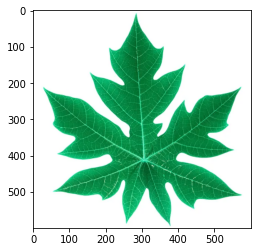

In [9]:
# show image using pyplot
img = cv2.imread('daun-pepaya.jpg')
plt.imshow(img)


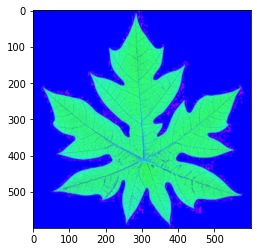

In [10]:
# konversi ke hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

(Text(0.5, 1.0, 'Value'), <matplotlib.image.AxesImage at 0x26a9dc552a0>)

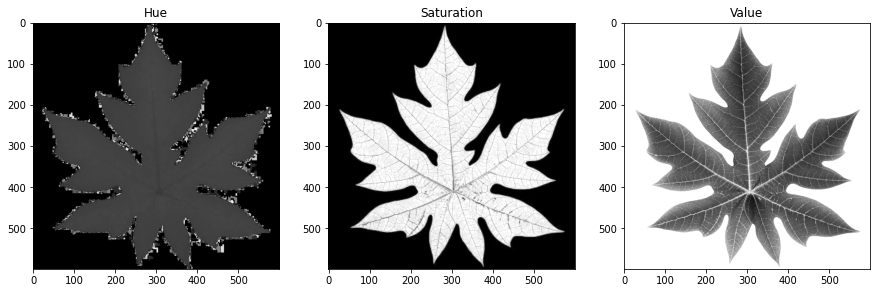

In [15]:
# ekstrak semua komponen hsv
H = hsv[:,:,0]
S = hsv[:,:,1]
V = hsv[:,:,2]
# tampilkan semua komponen hsv
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.title('Hue'), plt.imshow(H, cmap='gray')
plt.subplot(1,3,2)
plt.title('Saturation'), plt.imshow(S, cmap='gray')
plt.subplot(1,3,3)
plt.title('Value'), plt.imshow(V, cmap='gray')


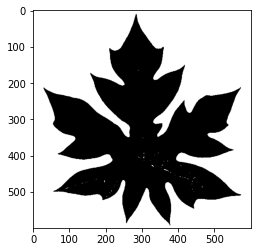

In [16]:
# tresholding terhadap komponen S
# hal ini dilakukan untuk mendapatkan citra biner hasil segmentasi
ret, thresh = cv2.threshold(S, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

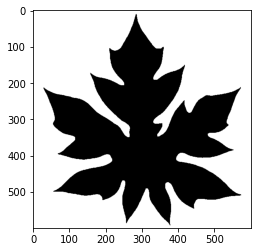

In [18]:
# operasi morfologi berupa filling holes dan area opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(opening, cmap='gray')

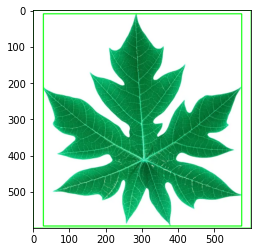

In [19]:
# memvisualisasikan hasil segmentasi pada citra rgb dalam bentuk bounding box
# cari kontur
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# buat bounding box
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# tampilkan hasil
plt.imshow(img)


# EKSTRAKSI BENTUK

Shape: rectangle, Metric: 0.7853981633974483, Eccentricity: 0.46325137517610426


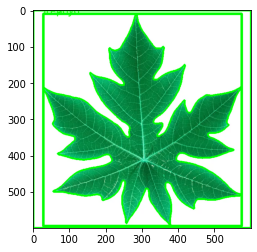

In [40]:
# melakukan pelabelan dan ekstraksi ciri terhadap objek yang terdeteksi pada citra rgb 
# cari kontur
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
# ekstraksi ciri bentuk 
# hitung luas dan keliling
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
# hitung metric
metric = 4*np.pi*area/perimeter**2
# hitung eccentricity
eccentricity = np.sqrt(1-metric)
# hitung bentuk
shape = 'unknown'
if perimeter != 0:
    circularity = 4*np.pi*(area/(perimeter*perimeter))
    if circularity > 0.8:
        shape = 'circle'
    else:
        shape = 'rectangle'
# tampilkan hasil
print('Shape: {}, Metric: {}, Eccentricity: {}'.format(shape, metric, eccentricity))

# tampilkan hasil
plt.imshow(img)
